<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3 - Web APIs & NLP

# Contents (Part 1)
- Executive Summary
- Problem Statement
- Background and Research
- Data Fetching
- Data Filtering (Apple)
- Data Filtering (Samsung)

# Contents (Part 2)

- Data Exploration
- Additional Data Filtering
- Data Dictionary
- Natural Language Processing (Apple)
- Natural Language Processing (Samsung)

# Contents (Part 3) - This notebook 

- [Preprocessing](#Preprocessing)
- [Dummy Classifier](#Dummy-Classifier)
- [Multinomial Naive-Bayes](#Multinomial-Naive-Bayes)
- [Logistic Regression](#Logistic-Regression)
- [Support Vector Classifier](#Support-Vector-Classifier)
- [Random Forest](#Random-Forest)
- [Results and Analysis](#Results-and-Analysis)
- [Conclusion and Recommendations](#Conclusion-and-Recommendations)

# Preprocessing

Some transformations have to be done on the word data to make it ready for modelling. The end result is that all data will be in numerical form.

## Importing libraries

Below, we import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve

from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Overrides Matplotlib theme with Seaborn's 
sns.set(font_scale = 1.2)
sns.set_context('talk')

# Enables Pandas to display all the columns
pd.set_option('display.max_columns', None)

# Enables Pandas to display all the rows
pd.set_option('display.max_rows', None)

# Enables Pandas to display more text in a column
pd.set_option('display.max_colwidth', 1000)

# Ignore warnings after model testing complete
import warnings
warnings.filterwarnings('ignore')

## Loading the data 

The combined data from Apple and Samsung is loaded:

In [2]:
df = pd.read_csv('../data/ap_ss.csv')

The data has 8000 rows, which means 8000 posts:

In [3]:
df.shape

(8000, 2)

In [4]:
df.head()

,text,subreddit
0,"Correct way to use battery pack? What is the correct way to use the battery pack, would it be plugging in the cable into the iphone or into the battery pack (when the battery pack is connected to the phone).",apple
1,"Will Siri ever be able to recognize the proper pronunciation of hard-to-pronounce names? As the title says, I am curious why Siri can't recognize the proper pronunciation of hard to pronounce names when you ask her to call someone. Shouldn't she be able, with time, to notice the difference? Do you think Apple is working on something like this?",apple
2,Question: is it better to ship airpods to apple or take them to the apple store? I bought some airpods pro about a year bought the full cover for it including accidents however it’s been a hassle for the last weeks trying to get them fixed… the closest place i have is a best buy and they pretty much said they couldn’t do anything because all of their diagnostics came out okay. I go 30 miles north to an apple store and they tell me i need to check for an appointment with the apple store and they have like 4 day wait time plus it’s 30 miles away. 30 miles that i drove already. At this point I’m wondering if it’s even worth the hassle if I’ll get new ones or fixed the same day ? ( the issue being the mic being muffled and little to no sound from the right airpod ). Or if I should just call and have them shipped? I never gotten insurance with any item before dint know it was gonna be such a pain to get the coverage.,apple
3,"Should I get the 2021 12.9” iPad Pro or wait till next year? I’m a student and I want to get an iPad for note taking, and maybe for drawing also. But I don’t know if I should wait or not, apparently there’s something new/big coming next year and I want to know if it’s worth the wait.",apple
4,iMessage So I block someone on my iphone but suddenly I get a text from them on iMessage on my Desktop. WTF?!,apple


In [5]:
df.tail()

,text,subreddit
7995,"Galaxy Tabs / Books Do these devices allow you to install Google Chrome desktop version? Or is it the same slim app as my android phone uses? I ask because I was looking into buying one of these for my job, however, I use a lot of Chrome extensions that can't be used with the mobile Chrome version.",samsung
7996,Issues sending &amp; receiving pictures with overseas numbers I have an S20 and my friend has an S21. For months now pictures have been delayed for days or not showing up at all. I've talked with support and even switched service providers but it doesn't seem to be helping. Any ideas of how to fix this?,samsung
7997,"Samsung notes no longer unlockable with fingerprint? Hello Everyone, As the title says, now the app wants me to enter my email address or create a samsung account. Does anyone noticed this?",samsung
7998,When is the note 10 lite getting a ONE UI 3.1 update??? I know its been updated early March but I still haven't gotten it and I live in the middle East and been waiting for the update to come out. Will I be able to update it or is updates for my note 10 lite???,samsung
7999,"Is it Crazy to switch from Note20U to the S21? So I bought my N20U when it released and though it is an amazing phone it is just way to big for me. I drop it alot, bump it on tables or falls out my hand that it became an annoying daily struggle. I was thinking to switch to the s21 because I can get a great trade deal, but I was wondering if the switch would feel to much of a downgrade? I'm scared that the FHD would become a thing for me since I now use the 2k resolution. Any thoughts to share?",samsung


## Target column

As the end result must be in numerical form, we will start with the target column. Since this is binary classification, we will assign Apple to '0' and Samsung to '1':

In [6]:
df['subreddit'] = df['subreddit'].map(dict(apple=0, samsung=1))

In [7]:
df.head()

,text,subreddit
0,"Correct way to use battery pack? What is the correct way to use the battery pack, would it be plugging in the cable into the iphone or into the battery pack (when the battery pack is connected to the phone).",0
1,"Will Siri ever be able to recognize the proper pronunciation of hard-to-pronounce names? As the title says, I am curious why Siri can't recognize the proper pronunciation of hard to pronounce names when you ask her to call someone. Shouldn't she be able, with time, to notice the difference? Do you think Apple is working on something like this?",0
2,Question: is it better to ship airpods to apple or take them to the apple store? I bought some airpods pro about a year bought the full cover for it including accidents however it’s been a hassle for the last weeks trying to get them fixed… the closest place i have is a best buy and they pretty much said they couldn’t do anything because all of their diagnostics came out okay. I go 30 miles north to an apple store and they tell me i need to check for an appointment with the apple store and they have like 4 day wait time plus it’s 30 miles away. 30 miles that i drove already. At this point I’m wondering if it’s even worth the hassle if I’ll get new ones or fixed the same day ? ( the issue being the mic being muffled and little to no sound from the right airpod ). Or if I should just call and have them shipped? I never gotten insurance with any item before dint know it was gonna be such a pain to get the coverage.,0
3,"Should I get the 2021 12.9” iPad Pro or wait till next year? I’m a student and I want to get an iPad for note taking, and maybe for drawing also. But I don’t know if I should wait or not, apparently there’s something new/big coming next year and I want to know if it’s worth the wait.",0
4,iMessage So I block someone on my iphone but suddenly I get a text from them on iMessage on my Desktop. WTF?!,0


In [8]:
df.tail()

,text,subreddit
7995,"Galaxy Tabs / Books Do these devices allow you to install Google Chrome desktop version? Or is it the same slim app as my android phone uses? I ask because I was looking into buying one of these for my job, however, I use a lot of Chrome extensions that can't be used with the mobile Chrome version.",1
7996,Issues sending &amp; receiving pictures with overseas numbers I have an S20 and my friend has an S21. For months now pictures have been delayed for days or not showing up at all. I've talked with support and even switched service providers but it doesn't seem to be helping. Any ideas of how to fix this?,1
7997,"Samsung notes no longer unlockable with fingerprint? Hello Everyone, As the title says, now the app wants me to enter my email address or create a samsung account. Does anyone noticed this?",1
7998,When is the note 10 lite getting a ONE UI 3.1 update??? I know its been updated early March but I still haven't gotten it and I live in the middle East and been waiting for the update to come out. Will I be able to update it or is updates for my note 10 lite???,1
7999,"Is it Crazy to switch from Note20U to the S21? So I bought my N20U when it released and though it is an amazing phone it is just way to big for me. I drop it alot, bump it on tables or falls out my hand that it became an annoying daily struggle. I was thinking to switch to the s21 because I can get a great trade deal, but I was wondering if the switch would feel to much of a downgrade? I'm scared that the FHD would become a thing for me since I now use the 2k resolution. Any thoughts to share?",1


The target column has been changed to numbers.

## Splitting the data

The X portion of the data (features) will simply be the `text` column, and the y portion will be the `subreddit` column. The data is assigned as follows: 

In [9]:
X = df['text']
y = df['subreddit']

A train-test split is done on the data.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=123)

The value counts of the target in the training set is as follows:

In [11]:
y_train.value_counts()

1    3007
0    2993
Name: subreddit, dtype: int64

As seen below, the classes are balanced. Therefore, we can go ahead with modelling without any compensation for class imbalances.

In [12]:
y_train.value_counts(normalize=True)

1    0.501167
0    0.498833
Name: subreddit, dtype: float64

The value counts of the target in the test set is as follows:

In [13]:
y_test.value_counts()

0    1007
1     993
Name: subreddit, dtype: int64

As seen below, the classes are balanced. Therefore, we can go ahead with modelling without any compensation for class imbalances.

In [14]:
y_test.value_counts(normalize=True)

0    0.5035
1    0.4965
Name: subreddit, dtype: float64

## Text cleaning

The function from the previous notebook will be used:

In [15]:
stopwords = nltk.corpus.stopwords.words('english')

wn = nltk.WordNetLemmatizer()

def clean_text(text):
    
    # Removes words that are all numeric characters, or words mixed with numbers
    text = re.sub(r'\w*\d\w*', '', text)
    
    # Tokenisation and punctuation removal. \W matches any non-word character (equivalent to [^a-zA-Z0-9_]).
    # Since \W does not match underscores, we specify '\W+|_' (\W or underscore).
    # Splits the text at any of these non-word characters (or groups of them). 
    # The '+' is to handle cases where there are 2 or more non-word characters between certain words
    tokens = re.split('\W+|_', text)
 
    # Removes all words that contain non-ASCII printable characters
    ascii_chars = set(string.printable)
    tokens =  [word for word in tokens if all(char in ascii_chars for char in word)]
    
    # Removes all empty strings, e.g. ''
    tokens = [word for word in tokens if word]
   
    # Apply lemmatisation, lowercasing and stopwords exclusion within the same step.
    tokens = [wn.lemmatize(word.lower()) for word in tokens if word.lower() not in stopwords] 
     
    return tokens

## CountVectorizer 

After the `CountVectorizer` is applied, there can be more than 10,000 unique words. Therefore, some optimisation can be done for the `CountVectorizer`. 

Scikit-learn's `Pipeline` class allows us to create a pipeline where `GridSearchCV` can help us search over the possible parameters of the `CountVectorizer` that return the best model performance. The vectorizer can be set to only include the top words in the data according to a specified number, or only include words when they appear in a specified number of posts. It can also exclude words that are too common which appear in more than a specified percentage of posts.

As this is a very resource-intensive operation, the vectorizer will be optimised on Multinomial Naive Bayes as a starting point, and we will use these parameters to generate an array. This reduced array will be used for subsequent modelling. 

The following code sets up the grid search.

In [16]:
# Setting up the Pipeline with Multinomial Naive Bayes
# The CountVectorizer uses the 'clean_text' function defined above
pipe = Pipeline([
    ('cvec', CountVectorizer(analyzer=clean_text)),
    ('nb', MultinomialNB())
])

# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# Minimum number of documents needed to include token: 2, 3
# Maximum number of documents needed to include token: 90%, 95%
# Try an array with (individual tokens) and also check (individual tokens and 2-grams).
pipe_params = {
    'cvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)]
}

# Instantiate GridSearchCV.
gs = GridSearchCV(pipe, # The object being optimised
                  param_grid=pipe_params, # The dictionary of paramters
                  cv=5, # 5-fold cross-validation
                  n_jobs=-1, # Use all available processors in computer
                  verbose=1) # Generate more detailed output

# Fit the pipeline to the training data.
gs.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(analyzer=<function clean_text at 0x00000160A95D6DC0>)),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)]},
             verbose=1)

The model's score on the training set:

In [17]:
gs.score(X_train, y_train)

0.9491666666666667

The model's score on the test set:

In [18]:
gs.score(X_test, y_test)

0.947

These are the best parameters for the `CountVectorizer`.

In [19]:
gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 2000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 1)}

We will use these parameters to generate an optimised array for subsequent modelling. It seems that we can drastically reduce the number of words used by the model, and bigrams are not better than unigrams in this case. 

In [20]:
count_vect = CountVectorizer(analyzer=clean_text, 
                             max_features=2000, 
                             min_df=3, 
                             max_df=0.9)

X_train_c = count_vect.fit_transform(X_train)
X_test_c = count_vect.transform(X_test)

## TfidfVectorizer 

After the `TfidfVectorizer` is applied, there can be more than 10,000 unique words. Therefore, some optimisation can be done for the `TfidfVectorizer` in the same manner as before.

As this is a very resource-intensive operation, the vectorizer will be optimised on Multinomial Naive Bayes as a starting point, and we will use these parameters to generate an array. This reduced array will be used for subsequent modelling. 

The following code sets up the grid search.

In [21]:
# Setting up the Pipeline with Multinomial Naive Bayes
# The TfidfVectorizer uses the 'clean_text' function defined above
pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer(analyzer=clean_text)),
    ('nb', MultinomialNB())
])

# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# Minimum number of documents needed to include token: 2, 3
# Maximum number of documents needed to include token: 90%, 95%
# Try an array with (individual tokens) and also check (individual tokens and 2-grams).
pipe_tvec_params = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.9, .95],
    'tvec__ngram_range': [(1,1), (1,2)]
}

# Instantiate GridSearchCV.
gs_tvec = GridSearchCV(pipe_tvec, # The object being optimised
                       param_grid=pipe_tvec_params, # The dictionary of paramters
                       cv=5, # 5-fold cross-validation
                       n_jobs=-1, # Use all available processors in computer
                       verbose=1) # Generate more detailed output

# Fit the pipeline to the training data.
gs_tvec.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(analyzer=<function clean_text at 0x00000160A95D6DC0>)),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)]},
             verbose=1)

The model's score on the training set:

In [22]:
gs_tvec.score(X_train, y_train)

0.9505

The model's score on the test set:

In [23]:
gs_tvec.score(X_test, y_test)

0.927

These are the best parameters for the `TfidfVectorizer`.

In [24]:
gs_tvec.best_params_

{'tvec__max_df': 0.9,
 'tvec__max_features': 4000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 1)}

We will use these parameters to generate an optimised array for subsequent modelling. It seems that we can drastically reduce the number of words used by the model, and bigrams are not better than unigrams in this case. 

In [25]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text, 
                             max_features=4000, 
                             min_df=2, 
                             max_df=0.9)

X_train_t = tfidf_vect.fit_transform(X_train)
X_test_t = tfidf_vect.transform(X_test)

# Dummy Classifier 

This is a classifier that will always only predict the dominant class of the data it was trained on, when given a test set. We can use it to establish the baseline performance for a model. 

Below, we instantiate and fit the model. We are using the count-vectorized data here.

In [26]:
dum = DummyClassifier()
dum.fit(X_train_c, y_train)

DummyClassifier()

This is the model's score on the training set. The score for a classifier refers to the accuracy score, which represents how many posts the model predicts correctly, divided by the total number of predictions made.

In [27]:
dum.score(X_train_c, y_train)

0.5011666666666666

This is the model's score on the test set.

In [28]:
y_pred_dum = dum.predict(X_test_c)
accuracy_score(y_test, y_pred_dum)

0.4965

The dominant class in the training data was Class 1 (Samsung).

In [29]:
y_train.value_counts(normalize=True)

1    0.501167
0    0.498833
Name: subreddit, dtype: float64

Class 1 makes up 49.65% of the test set.

In [30]:
y_test.value_counts(normalize=True)

0    0.5035
1    0.4965
Name: subreddit, dtype: float64

Hence, this explains the accuracy score of 0.4965. Accuracy is defined with respect to predicting Class 1.

The classification report is shown below. The F1 score is the harmonic mean of the precision and recall. A low precision means there are many false positives, and a low recall means there are many false negatives. The F1 score integrates both metrics. 

In [31]:
print(metrics.classification_report(y_test,
                                    y_pred_dum,
                                    digits=3,
                                    target_names=['Apple', 'Samsung'],
                                    zero_division=0))

              precision    recall  f1-score   support

       Apple      0.000     0.000     0.000      1007
     Samsung      0.496     1.000     0.664       993

    accuracy                          0.496      2000
   macro avg      0.248     0.500     0.332      2000
weighted avg      0.247     0.496     0.329      2000



The area under the receiver operating characteristic (ROC) curve is as follows:

In [32]:
y_prob_dum = dum.predict_proba(X_test_c)[:,1]
roc_auc_score(y_test, y_prob_dum)

0.5

The score gets better when there are more true positives and less false positives. A perfect score is 1 and a baseline score is 0.5. This is a baseline ROC AUC score. 

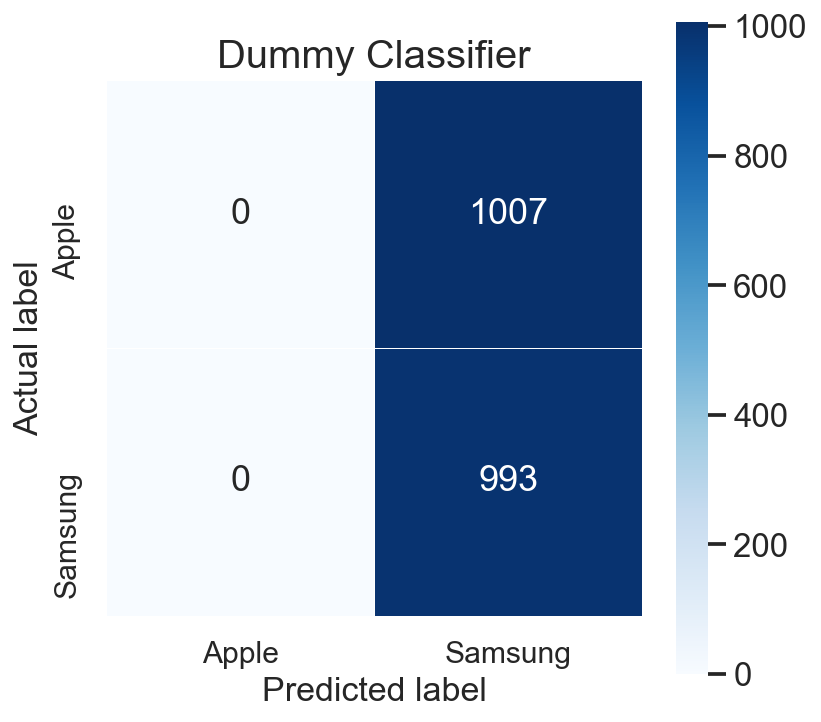

In [33]:
dum_cm = metrics.confusion_matrix(y_test, y_pred_dum)

plt.figure(figsize=(6,6))
sns.heatmap(dum_cm,
            annot=True,
            fmt='.0f',
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['Apple', 'Samsung'],
            yticklabels = ['Apple', 'Samsung'],
            );

plt.ylabel('Actual label', fontsize=17);
plt.xlabel('Predicted label', fontsize=17);
plt.title('Dummy Classifier', fontsize=20);
plt.tick_params(labelsize=15)

This is the confusion matrix, which shows that the model only predicted Samsung regardless of the post.

# Multinomial Naive-Bayes 

Naive Bayes calculates the probability that a word is either from Apple or Samsung given the words that are in the post. It assumes that predictors (the words) are independent of each other (this is not true in reality) and that past conditions still hold true. It uses Bayes' theorem. 

There is Bernoulli Naive Bayes, Multinomial Naive Bayes and Gaussian Naive Bayes. Multinomial Naive Bayes will be used, as Bernoulli is for when variables are either 0 or 1 (like dummy variables), and Gaussian works best when variables are normally distributed. Multinomial Naive Bayes is appropriate as our variables are positive integer counts.

Below, we want to use `GridSeachCV` to optmise for the following hyperparameters. We will define a function for Grid Search Cross-Validation to aid in modelling:

In [34]:
def grid_searcher(X_train, y_train, X_test, y_test, params, model):

    grid = GridSearchCV(model,
                        params,
                        cv=5,
                        n_jobs=-1) # Uses all available processors
    
    print('GridSearchCV on', model)
    
    grid.fit(X_train, y_train)
    
    print('Cross-validated training score (5-fold):', 
          cross_val_score(grid, X_train, y_train, cv=5).mean())
    print('Training score:', grid.score(X_train, y_train))
    print('Testing score:', grid.score(X_test, y_test))
    print('Best parameters:', grid.best_params_) 

The alpha parameter is the intensity of the Laplace smoothing parameter. This is to tackle the case where there are new words in the unseen data that the model has not trained on. If there is no Laplace smoothing, the model will assign a prior probability of zero to those words. This means the model will effectively ignore them. Adding Laplace smoothing is a correction to ensure that a zero probability will not be assigned to unseen words. 

`GridSearchCV` will be used to find the optimal alpha value. First, we will try this on the data where `CountVectorizer` was used,.and then on the data where `TfidfVectorizer` was used.

## Count-vectorized data

In [35]:
mnb_params = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
             }
    
grid_searcher(X_train_c,
              y_train,
              X_test_c,
              y_test,
              mnb_params,
              MultinomialNB())

GridSearchCV on MultinomialNB()
Cross-validated training score (5-fold): 0.9313333333333332
Training score: 0.9491666666666667
Testing score: 0.9455
Best parameters: {'alpha': 0.5}


## TFIDF-vectorized data

In [36]:
grid_searcher(X_train_t,
              y_train,
              X_test_t,
              y_test,
              mnb_params,
              MultinomialNB())

GridSearchCV on MultinomialNB()
Cross-validated training score (5-fold): 0.9188333333333334
Training score: 0.9505
Testing score: 0.927
Best parameters: {'alpha': 1.0}


`CountVectorizer` is better here, from the test score. The cross-validated score is not far off from it as well, which indicates the test score is reliable. The test accuracy is very close to the train accuracy for the count-vectorized data, which means the model is not overfitting. 

## Metrics

We will fit the model with these parameters and get more evaluation metrics.

In [37]:
mnb = MultinomialNB(alpha=0.5)
mnb.fit(X_train_c, y_train)

MultinomialNB(alpha=0.5)

The classification report is shown below.

In [38]:
y_pred_mnb = mnb.predict(X_test_c)
print(metrics.classification_report(y_test,
                                    y_pred_mnb,
                                    digits=3,
                                    target_names=['Apple', 'Samsung'],
                                    zero_division=0))

              precision    recall  f1-score   support

       Apple      0.963     0.928     0.945      1007
     Samsung      0.929     0.964     0.946       993

    accuracy                          0.946      2000
   macro avg      0.946     0.946     0.945      2000
weighted avg      0.946     0.946     0.945      2000



The area under the ROC curve is as follows:

In [39]:
y_prob_mnb = mnb.predict_proba(X_test_c)[:,1]
roc_auc_score(y_test, y_prob_mnb)

0.984258228653204

This is a high ROC AUC score.

We can get the log probabilities to see which of the words were the most significant predictors for their class.

In [40]:
# Get the sorted probabilities for the respective classes (decreasing order)
apple_prob = mnb.feature_log_prob_[0, :].argsort()[::-1]
samsung_prob = mnb.feature_log_prob_[1, :].argsort()[::-1]

# Combining the probabilities with their feature names into their own DataFrame (top 15 for each)
ap_prob = pd.DataFrame(np.take(count_vect.get_feature_names(), apple_prob[:15]))
ss_prob = pd.DataFrame(np.take(count_vect.get_feature_names(), samsung_prob[:15]))

# Combining the DataFrames and naming the columns
mnb_probs = pd.concat([ap_prob, ss_prob], axis=1)
mnb_probs.columns = ['Apple','Samsung']
mnb_probs

,Apple,Samsung
0,apple,samsung
1,iphone,phone
2,pro,galaxy
3,app,get
4,new,anyone
5,get,like
6,phone,screen
7,like,one
8,macbook,new
9,would,know


From this, we can see that the most significant predictors for each of the subreddits are the brand names, and some product names. For Apple, it seems that the word 'app' ranks highly as compared to for Samsung. This could be because of the Apple app ecosystem and its App Store, as pointed out in the Background and Research.

## Logistic Regression 

Logistic regression uses a sigmoid curve to predict the outcome as either 0 or 1. It is a model used for binary classification. 

We will use `GridSeachCV` to optimise the following hyperparameters. The form of regularisation penalty to penalise overly-strong coefficents will be optimised, and also the 'C' parameter. The 'C' parameter is the inverse of the regularisation strength, so as to add further tuning to the regularisation. 

## Count-vectorized data

In [41]:
log_params = {'penalty': ['l1', 'l2', 'None'], 
              'C': [0.01,0.1,1,10,100],
              'solver': ['liblinear'],
              'random_state': [123]
             }

grid_searcher(X_train_c,
              y_train,
              X_test_c,
              y_test,
              log_params,
              LogisticRegression())

GridSearchCV on LogisticRegression()
Cross-validated training score (5-fold): 0.9426666666666668
Training score: 0.9773333333333334
Testing score: 0.9485
Best parameters: {'C': 0.1, 'penalty': 'l2', 'random_state': 123, 'solver': 'liblinear'}


## TFIDF-vectorized data

In [42]:
grid_searcher(X_train_t,
              y_train,
              X_test_t,
              y_test,
              log_params,
              LogisticRegression())

GridSearchCV on LogisticRegression()
Cross-validated training score (5-fold): 0.9406666666666667
Training score: 0.973
Testing score: 0.956
Best parameters: {'C': 1, 'penalty': 'l2', 'random_state': 123, 'solver': 'liblinear'}


`TfidfVectorizer` is better here, from the test score. The cross-validated score is not far off from it as well, which indicates the test score is reliable. 

## Metrics

We will fit the model with these parameters and get more evaluation metrics.

In [43]:
logreg = LogisticRegression(C=1,
                            penalty='l2',
                            solver='liblinear',
                            random_state=123)

logreg.fit(X_train_t, y_train)

LogisticRegression(C=1, random_state=123, solver='liblinear')

The classification report is shown below.

In [44]:
y_pred_logreg = logreg.predict(X_test_t)
print(metrics.classification_report(y_test,
                                    y_pred_logreg,
                                    digits=3,
                                    target_names=['Apple', 'Samsung'],
                                    zero_division=0))

              precision    recall  f1-score   support

       Apple      0.967     0.944     0.956      1007
     Samsung      0.945     0.968     0.956       993

    accuracy                          0.956      2000
   macro avg      0.956     0.956     0.956      2000
weighted avg      0.956     0.956     0.956      2000



The area under the ROC curve is as follows:

In [45]:
y_prob_logreg = logreg.predict_proba(X_test_t)[:,1]
roc_auc_score(y_test, y_prob_logreg)

0.9907245455027297

This is a high ROC AUC score.

We can get the feature importances to see which of the words were the most significant predictors for their class.

In [46]:
# Create a DataFrame from the model coefficients
# Exponentiation is used to reverse the logarithmic odds
log_coeffs = pd.DataFrame(zip(np.exp(logreg.coef_[0]),tfidf_vect.get_feature_names()))

# Naming the columns
log_coeffs.rename(columns = { 0: 'Coefficients', 1: 'Words' }, inplace=True)

# Takes the first 15 rows of the DataFrame
log_coeffs.sort_values(by='Coefficients', ascending=False).head(15)

,Coefficients,Words
3032,525257.229466,samsung
1465,1981.347770,galaxy
3699,380.656910,ultra
2500,52.795805,phone
424,23.571214,bud
1291,18.846937,fe
2304,13.475384,note
3679,11.402270,tv
1370,11.222713,flip
1383,11.212334,fold


The largest coefficients indicate the words that are predictive of Class 1, which is Samsung. We can indeed see that there are many words related to the brand and its products.

In [47]:
# Creates a DataFrame from the last 15 rows of the coefficients
logsort = log_coeffs.sort_values(by='Coefficients', ascending=False).tail(15)

# Reverses the ordering so that the highest predictors appear at the top
logsort.sort_values(by='Coefficients')

,Coefficients,Words
171,0.000041,apple
1852,0.000634,iphone
2062,0.001926,macbook
87,0.005433,airpods
1846,0.011825,io
1849,0.012777,ipad
2639,0.017533,pro
2061,0.021146,mac
1707,0.036519,icloud
1729,0.054895,imac


The smallest coefficients indicate the words that are predictive of Class 0, which is Apple. We can indeed see that there are many words related to the brand and its products. 

For both, there seems to be more brand-related words than with the top features for Naive Bayes. This could be due to the regularisation here penalising very strong coefficients, thus reducing noise.

# Support Vector Classifier

This model tries to fit a hyperplane to separate the 2 classes of data. We have a binary target variable, so this is suitable. 

We will be optimising the 'C' parameter through `GridSearchCV`. A higher C value indicates a higher penalty for misclassification when training the model, which leads to the model fitting closely. However, this value must not be too high as to encourage overfitting. Again, we will try both count-vectorized and TFIDF-vectorized data.

## Count-vectorized data

In [48]:
svc_params = {'C': [0.1,1,10],
              'random_state': [123],
             }

grid_searcher(X_train_c,
              y_train,
              X_test_c,
              y_test,
              svc_params,
              SVC())

GridSearchCV on SVC()
Cross-validated training score (5-fold): 0.9375
Training score: 0.9825
Testing score: 0.946
Best parameters: {'C': 1, 'random_state': 123}


## TFIDF-vectorized data

In [49]:
grid_searcher(X_train_t,
              y_train,
              X_test_t,
              y_test,
              svc_params,
              SVC())

GridSearchCV on SVC()
Cross-validated training score (5-fold): 0.9423333333333334
Training score: 0.9955
Testing score: 0.956
Best parameters: {'C': 1, 'random_state': 123}


`TfidfVectorizer` is better here, from the test score. The cross-validated score is not far off from it as well, which indicates the test score is reliable.

## Metrics

We will fit the model with these parameters and get more evaluation metrics.

In [50]:
svc = SVC(C=1, probability=True, random_state=123)
svc.fit(X_train_t, y_train)

SVC(C=1, probability=True, random_state=123)

The classification report is shown below.

In [51]:
y_pred_svc = svc.predict(X_test_t)
print(metrics.classification_report(y_test,
                                    y_pred_svc,
                                    digits=3,
                                    target_names=['Apple', 'Samsung'],
                                    zero_division=0))

              precision    recall  f1-score   support

       Apple      0.969     0.942     0.956      1007
     Samsung      0.943     0.970     0.956       993

    accuracy                          0.956      2000
   macro avg      0.956     0.956     0.956      2000
weighted avg      0.956     0.956     0.956      2000



The area under the ROC curve is as follows:

In [52]:
y_pred_svc = svc.predict(X_test_t)
y_prob_svc = svc.predict_proba(X_test_t)[:,1]
roc_auc_score(y_test, y_prob_svc)

0.9905595374173334

This is a high ROC AUC score. 

Feature importances are not available for this model.

# Random Forest

This model uses an ensemble of decision trees that vote for the predicted class. The decision trees are formed using bagging, also known as bootstrap aggregation. High variance may be brought down (overfitting reduced) due to the averaging nature of the model. This model is flexible as it can handle multiple data types. However, it can be computationally expensive. 


## Count-vectorized data

In [53]:
rf_params = {'max_features': [20, 30],
             'n_estimators': [100, 500], 
             'random_state': [123]
            }

grid_searcher(X_train_c,
              y_train,
              X_test_c,
              y_test,
              rf_params,
              RandomForestClassifier())

GridSearchCV on RandomForestClassifier()
Cross-validated training score (5-fold): 0.9495000000000001
Training score: 1.0
Testing score: 0.952
Best parameters: {'max_features': 20, 'n_estimators': 500, 'random_state': 123}


## TFIDF-vectorized data

In [54]:
grid_searcher(X_train_t,
              y_train,
              X_test_t,
              y_test,
              rf_params,
              RandomForestClassifier())

GridSearchCV on RandomForestClassifier()
Cross-validated training score (5-fold): 0.9461666666666666
Training score: 1.0
Testing score: 0.9525
Best parameters: {'max_features': 20, 'n_estimators': 500, 'random_state': 123}


`TfidfVectorizer` is better here, from the test score. The cross-validated score is not far off from it as well, which indicates the test score is reliable. There is only a very slight performance improvement from the `CountVectorizer`. The models are overfitting a lot to the training data. Hence, some additional hyperparameter tuning may be required to reduce the overfitting. 

## Metrics

We will fit the model with these parameters and get more evaluation metrics.

In [55]:
rf = RandomForestClassifier(max_features=20,
                            n_estimators=500,
                            random_state=123)
rf.fit(X_train_t, y_train)

RandomForestClassifier(max_features=20, n_estimators=500, random_state=123)

The classification report is shown below.

In [56]:
y_pred_rf = rf.predict(X_test_t)
print(metrics.classification_report(y_test,
                                    y_pred_rf,
                                    digits=3,
                                    target_names=['Apple', 'Samsung'],
                                    zero_division=0))

              precision    recall  f1-score   support

       Apple      0.974     0.930     0.952      1007
     Samsung      0.933     0.975     0.953       993

    accuracy                          0.953      2000
   macro avg      0.953     0.953     0.952      2000
weighted avg      0.953     0.953     0.952      2000



The area under the ROC curve is as follows:

In [57]:
y_prob_rf = rf.predict_proba(X_test_t)[:,1]
roc_auc_score(y_test, y_prob_rf)

0.989828001572077

This is a high ROC AUC score. 

Feature importances are not available for this model.

# Results and Analysis

The models with their details and metrics are as follows:

|Model|Test Accuracy|Training Accuracy|F1 Score (Apple)|F1 Score (Samsung)|ROC AUC|Vectorization|
|---|---|---|---|---|---|---|
|**Dummy Classifier**|0.496|0.501|0.000|0.664|0.500|Count|
|**Multinomial Naive-Bayes**|0.946|0.949|0.945|0.946|0.984|Count|
|**Logistic Regression**|0.956|0.973|0.956|0.956|0.991|TFIDF|
|**Support Vector Classifier**|0.956|0.996|0.956|0.956|0.991|TFIDF|
|**Random Forest**|0.953|1.000|0.952|0.953|0.990|TFIDF|

Logistic Regression is tied with Support Vector Classifier across all the metrics. However, Logistic Regression takes much less time to run and is more interpretable (feature importances can be obtained). Just to note, if we go one more decimal place down the ROC AUC score, Logistic Regression is higher at 0.9907, versus 0.9905 for the Support Vector Classifier. Finally, the difference between the training accuracy and the test accuracy is higher for the Support Vector Classifier as opposed to Logistic Regression. This means that the Support Vector Classifier is overfitting more than Logistic Regression. 

Therefore, the model of choice is Logistic Regression.

The ROC curves are as follows:

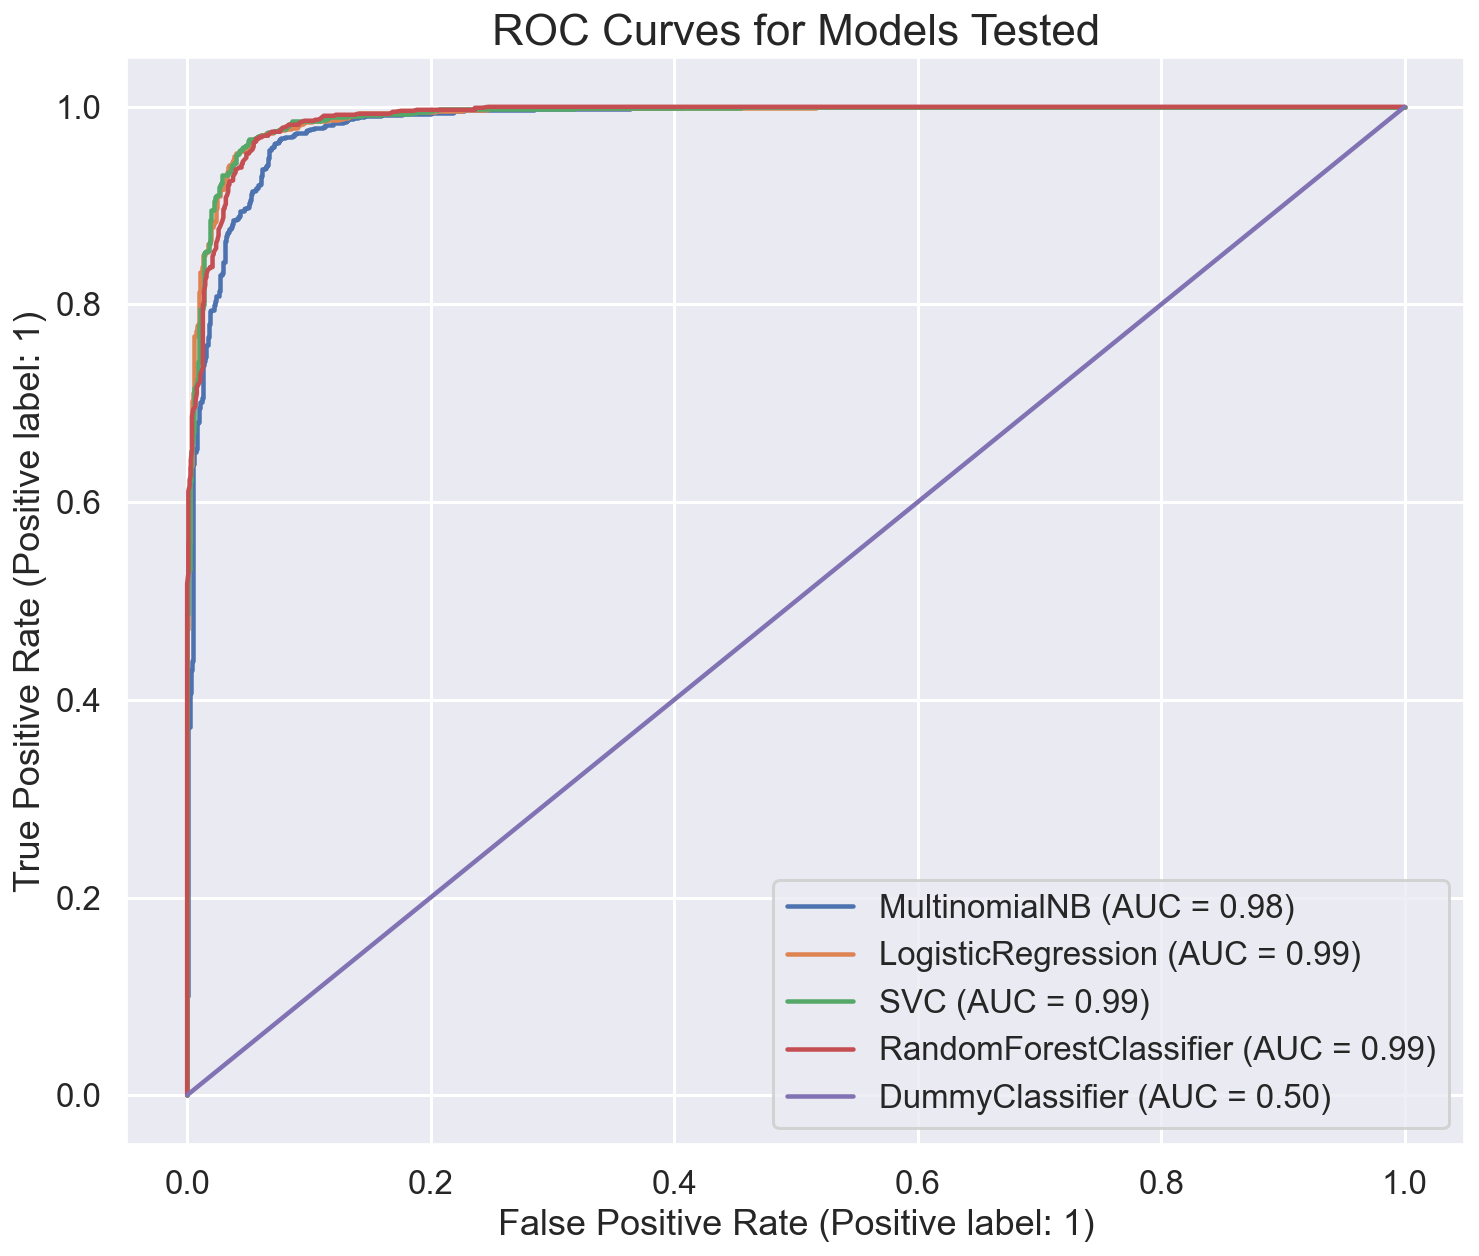

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(12,10))
plot_roc_curve(mnb, X_test_c, y_test, ax=ax)
plot_roc_curve(logreg, X_test_t, y_test, ax=ax)
plot_roc_curve(svc, X_test_t, y_test, ax=ax)
plot_roc_curve(rf, X_test_t, y_test, ax=ax)
plot_roc_curve(dum, X_test_t, y_test, ax=ax)
plt.title('ROC Curves for Models Tested', fontsize=22)
plt.legend();

From the plot, we can see that the models are all similar in terms of the AUC, with Multinomial Naive Bayes having a slightly lower score.

## Further evaluation of Logistic Regression

We will look more into Logistic Regression and where it misclassified the posts.

This is the confusion matrix, which shows the numer of misclassifications for each class:

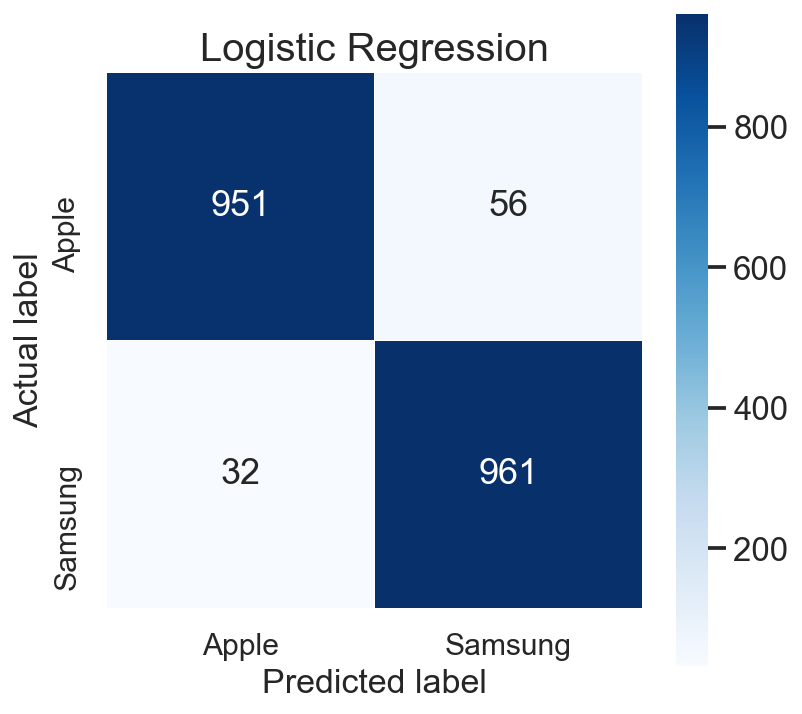

In [59]:
mnb_cm = metrics.confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(6,6))
sns.heatmap(mnb_cm,
            annot=True,
            fmt='.0f',
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['Apple', 'Samsung'],
            yticklabels = ['Apple', 'Samsung'],
            );

plt.ylabel('Actual label', fontsize=17);
plt.xlabel('Predicted label', fontsize=17);
plt.title('Logistic Regression', fontsize=20);
plt.tick_params(labelsize=15)

We can fetch the rows where the model made a mistake.

In [60]:
# Creating a DataFrame showing the text with the actual and predicted classes 
logreg_df = pd.DataFrame(X_test, columns=['text'])
logreg_df['actual'] = y_test
logreg_df['predicted'] = y_pred_logreg
logreg_wrong = logreg_df[logreg_df["actual"] != logreg_df["predicted"]]

This is a sample of posts where the model predicted Apple when the post was from the Samsung subreddit.

In [61]:
logreg_wrong[logreg_wrong['predicted'] == 0].head()

,text,actual,predicted
4395,"iPhone 12 Pro Max to S21 Ultra worth the switch? Hello everyone, I've currently got an iPhone 12 Pro Max which I've had for about 10 months and have had issues with (battery life, software issues, etc) I can get an S21 Ultra on contract from my carrier for around £56 a month and was wondering if it's worth the switch this late into the year.",1,0
5950,"Should I get the S21 or wait for S22? I currently have an A70 which got a little sluggish in the past few weeks. In your opinion, would it be wiser for me to get the S21 now or wait for the S22 (which will most likely be released in January next year)?",1,0
7757,"Tablet suggestions Looking for a tablet for some basic web browsing, social media etc, but also for some light photo editing using Lightroom, Snapseed, etc. I pretty much had my mind set on a tab s6 light. Can pick a 64g for around $400cdn. The s7 I can probably find for around $800. Basically twice as much. Unsure if it would be twice as good though. That said, I don't want to regret my purchase. I do want spen or a stylus. I've considered an iPad but the extra cost of the Apple pencil adds up quickly. Halp",1,0
7155,"Would the S21 last 3/4 years? Hey people, Upgrading from an S8 with 30 mins SOT (3000mAh), and currently looking at the S21 (4000mAh). Would it be enough to last 3 years or even 4 in terms of battery, or would I need to go for the S21+ (4800mAh)? Thanks.",1,0
4972,Can I buy just a pair of earbuds ? So I broke 1 of the 2 earbuds with the other being slightly damaged. Is there a way I can buy another pair without the case ?,1,0


It seems that some posts that were misclassified mentioned Apple as well, such as those mentioning the iPhone, iPad and Apple pencil. There were some Samsung model names mentioned like S22, A70 and S8, but this would not have been factored in as the text cleaning function removed words with both letters and numbers. (This was done because there was a high presence of nonsense words with numbers and letters.)

This is a sample of posts where the model predicted Samsung when the post was from the Apple subreddit: 

In [62]:
logreg_wrong[logreg_wrong['predicted'] == 1].head()

,text,actual,predicted
3904,"LPT: On safari if you open tab view and put your phone into landscape mode, you can long press on any tab and sort them by title or sort tabs by website. This is quite useful to sort tabs if you have around 200-300 open. Also a bonus tip, while in tab view, if you scroll all the way to the top and search for a certain tab and then long press the cancel button you can close all tabs matching your search result.",0,1
2374,"[Hardware] Anyone knows how to fix magic mouse not scrolling? I have a previous version of a Magic Mouse that my son opened breaking the part that keep the cover on the mouse itself. I put it back, and it is working perfectly (mostly) apart that is not scrolling anymore. It seems to be a hardware problem: anyone knows if I can fix it?",0,1
2864,"Can you recommend a screen protector for apple watch series 4 I bought a screen protector a week ago and it disturbed the touch sensitivity so i got rid of it, today a small scratch on the screen took me by surprise and it mentally hurt me, So, do any of you guys using a screen protector that can really recommend ?",0,1
1957,help so my phone is stuck on te apple logo. te one that happens after you charge your phone after it is dead it wont turn of,0,1
1635,"How fast do wireless chargers charge? I recently bought an iPhone 11, and a cheap 5V wireless charging pad with it. I also put on an Otterbox Defender case, and it supports wireless charging. In the 3 days, I've had the phone, it has never reached above 50% charge. I've only used the wireless charger, which charges at about 2% every 30 minutes. Is wireless charging that slow? Or is there somwthing else I should know about? Help is greatly appreciated.",0,1


The misclassification here may have been due to mentioning words like 'tab', 'watch' and 'wireless charger' which are also related to Samsung products. 

We can also look at posts that were correctly classified:

In [63]:
logreg_df[logreg_df['predicted'] == 0].head()

,text,actual,predicted
617,"An A.I. that can give feedback on a dating profile to get better results. Cupido - The A.I. dating coach is the first A.I. dating coach that helps online daters to create a better dating profile and start a personalized conversation. 1. Cupido will review your dating profile and tell you how to improve it to suit your personality and dating goals. 2. Cupido will review and give you insights about your photos to present your best version. 3. Cupido will advise on creating your best profile using bio and the right photos to represent your lifestyle and personality in order to attract the right people. 4. Cupido will review all your photos and will help you to choose the most suitable first photo to create a better first impression. 5. Cupido will review your profile and profile of your match and suggest to you the best conversation starters that will interest your match. 6. Cupido will help you understand the intention, what to expect from the match, and educate you on impress...",0,0
415,"Over 500 random contacts on iPad I don’t even have a iPhone, but somehow there are over 500 random contacts on my iPad. I typed in “mom” in the contacts and got 3 different “moms” with 3 different phone numbers, which implies that somehow different iCloud accounts have gotten synced with mine??? I immediately checked how many devices are linked with my iCloud account, and I found a random iPhone. I have no idea how that got onto my iCloud considering I only used my iPad for browsing and youtube. Now I’ve sent a request in to delete my old account, but I’m afraid of how much damage has been caused if someone did have access to my account. How bad would it have been if someone had access to my iCloud account? What would they have been able to see? Would my other accounts (reddit, google, etc) be compromised too or is it only my photos and notes (which is still pretty bad).",0,0
3390,"Best setup for dual screens (dock/adapter) Hello, I am getting a mac 15inch with touch bar from my company soon. I have two hp dell monitors with USB C and HDMI connections among others. What is the best dock/adapter for this set up? I would prefer all 3 screens separate but I can live with 1 extended and 1 mirrored. I currently have a j5create adapter for my windows and it works well. It's regular USB standard though so I do not believe it will work with the new mac coming. If anyone has any recommendations please let me know. TY.",0,0
1692,"Question about trade-in value I made an impulse decision and bought the iPad mini 5. Since I’m a college student, I want to make the switch to the $800 iPad Pro and was wondering what the trade in value for an iPad mini 5 in excellent condition would be? On the website for trade in devices there is no option for mini 5 only 4 and lower. If anyone knows a rough estimate it would save me a long trip to the mall to ask an employee the worth. Thank you!",0,0
3076,"Are text suggestions device specific or do they mimic if two devices have the same Apple ID? Boyfriend and I had the same Apple ID. We both just got new phones. He continued using his and I made a new Apple ID. There’s a unique name that keeps popping up in his text suggestions on his new phone. Could this mean the data/text suggestion transferred from his Apple ID from his old device, or is the only plausible answer that he’s typing this name frequently on his new phone? Is text suggestion device specific or is it synced with your Apple ID. Hope this makes sense!",0,0


In [64]:
logreg_df[logreg_df['predicted'] == 1].head()

,text,actual,predicted
5676,S20+ support e-sim Is it true that the S20+ (SM-G986U1) does not support E-SIM? Or is there a possibility to do support with the exchange of CSC and firmware?*📷*,1,1
7687,"S21 ULtra, no charger? I just opened my box and all I see is a cable. Wtf??? I even asked the employee I bought it from whether or not there would be a charger in the box and she said yes. What am I supposed to do now? It's late at night, where tf am I supposed to go to charge this phone.",1,1
6708,"Samsung Theme Park and Key Café I've had fun with these apps customizing my phone. They offer tons of options for themeing and customization. The problem is it always seems to look tacky, and I end up going back to the stock theme. Anyone else have this issue or have you made a theme that looks better than stock amoled black and blue? I find stock just jives better with apps and the overall OneUI experience.",1,1
6864,"Samsung Block Chain/Wallet I am looking at using the crypto wallet built into the handset. I have a bit of change in some eth, and stuff. Are any of my fellow samsung users using it? Easy as putting your key in cold storage after you signed in or up? Any folk with experience or thinking about it too, please comment. Thankyou.",1,1
6664,"Whats the best deal on a Samsung Galaxy S21 ultra? Looking to get a new one, have a cracked note 8 to trade in",1,1


The posts have brand and product names that match with their subreddit.

To further investigate, we can look at setting the brand and common product names as stopwords, so that we can filter out these strong predictors and see what other words come up as predictors. Below, we run the model again, but stopwords related to Apple or Samsung products and proprietary names are removed. 

In [65]:
custom_stopwords = nltk.corpus.stopwords.words('english')

stopword_list = ['apple', 'iphone', 'iphones', 'macbook', 'ipad', 'pro', 'pros', 'airpods', 'airpod',
                 'ios', 'mac', 'catalina','itunes', 'imac', 'icloud', 'safari', 'macos', 'max', 'air', 
                 'mbp', 'ipod','samsung', 'galaxy', 'ultra', 'note', 'bud', 'buds', 'fold', 'ui', 'tab', 
                 'flip', 'z', 'fe', 'exynos', 'oneui', 'bixby', 'siri', 'mini', 'xr', 'smart', 'gallery', 
                 'applecare', 'lightning', 'id', 'x', 'xs', 'se', 'pencil', 'airplay', 'pen', 'pens', 
                 'earbuds', 'edge', 'gen', 'snapdragon', 'lite', 'phone', 'phones', 'tablet', 'tablets', 
                 'tv', 'tvs', 'dex', 'thunderbolt']

custom_stopwords.extend(stopword_list)

wn = nltk.WordNetLemmatizer()

def clean_text_custom(text):
    
    # Removes words that are all numeric characters, or words mixed with numbers
    text = re.sub(r'\w*\d\w*', '', text)
    
    # Tokenisation and punctuation removal. \W matches any non-word character (equivalent to [^a-zA-Z0-9_]).
    # Since \W does not match underscores, we specify '\W+|_' (\W or underscore).
    # Splits the text at any of these non-word characters (or groups of them). 
    # The '+' is to handle cases where there are 2 or more non-word characters between certain words
    tokens = re.split('\W+|_', text)
 
    # Removes all words that contain non-ASCII printable characters
    ascii_chars = set(string.printable)
    tokens =  [word for word in tokens if all(char in ascii_chars for char in word)]
    
    # Removes all empty strings, e.g. ''
    tokens = [word for word in tokens if word]
   
    # Apply lemmatisation, lowercasing and stopwords exclusion within the same step.
    tokens = [wn.lemmatize(word.lower()) for word in tokens if word.lower() not in custom_stopwords] 
     
    return tokens

# Instantiating the TfidfVectorizer
tfidf_vect_custom = TfidfVectorizer(analyzer=clean_text_custom, 
                             max_features=4000, 
                             min_df=2, 
                             max_df=0.9)

# Creating the TfidfVectorizer-transformed arrays 
X_train_t_custom = tfidf_vect_custom.fit_transform(X_train)
X_test_t_custom = tfidf_vect_custom.transform(X_test)

# Instantiating Logistic Regression
logreg_custom = LogisticRegression(C=1,
                            penalty='l2',
                            solver='liblinear',
                            random_state=123)

# Fitting the model
logreg_custom.fit(X_train_t_custom, y_train)

LogisticRegression(C=1, random_state=123, solver='liblinear')

The classification report is shown below.

In [66]:
y_pred_logreg_custom = logreg_custom.predict(X_test_t_custom)
print(metrics.classification_report(y_test,
                                    y_pred_logreg_custom,
                                    digits=3,
                                    target_names=['Apple', 'Samsung'],
                                    zero_division=0))

              precision    recall  f1-score   support

       Apple      0.754     0.714     0.734      1007
     Samsung      0.725     0.764     0.744       993

    accuracy                          0.739      2000
   macro avg      0.740     0.739     0.739      2000
weighted avg      0.740     0.739     0.739      2000



The test accuracy dropped to 0.739.

The area under the ROC curve is as follows:

In [67]:
y_prob_logreg_custom = logreg_custom.predict_proba(X_test_t)[:,1]
roc_auc_score(y_test, y_prob_logreg_custom)

0.5690118815821975

The AUC dropped by a large amount.

We will get the feature importances to see which of the words were the most significant predictors for their class:

In [68]:
# Create a DataFrame from the model coefficients
# Exponentiation is used to reverse the logarithmic odds
log_coeffs_custom = pd.DataFrame(zip(np.exp(logreg_custom.coef_[0]),tfidf_vect_custom.get_feature_names()))

# Naming the columns
log_coeffs_custom.rename(columns = { 0: 'Coefficients', 1: 'Words' }, inplace=True)

# Takes the first 15 rows of the DataFrame
log_coeffs_custom.sort_values(by='Coefficients', ascending=False).head(15)

,Coefficients,Words
1498,17.000346,google
1219,10.366935,factory
1241,10.039949,fast
148,6.925804,anyone
3100,6.709936,setting
3037,6.220103,sd
28,5.880792,active
2293,5.712270,notification
3710,5.549371,unlocked
2843,5.543392,remote


The largest coefficients indicate the words that are predictive of Class 1, which is Samsung. We can see that 'fast' is one of the words here. This would mean that people on the Samsung Reddit could be concerned about the speed of the Samsung products. The bigram 'fast charging' was also seen in the bigram analysis, and the trigram 'super fast charging' was also seen. This is supported by the finding stated in the Background and Research regarding the fast charging function. In addition, 'fingerprint' is listed, which was also mentioned in the Background and Research regarding the in-screen fingerprint sensors by Samsung.

In [69]:
# Creates a DataFrame from the last 15 rows of the coefficients
logsort_custom = log_coeffs_custom.sort_values(by='Coefficients', ascending=False).tail(15)

# Reverses the ordering so that the highest predictors appear at the top
logsort_custom.sort_values(by='Coefficients')

,Coefficients,Words
2619,0.044761,product
3351,0.056139,store
676,0.077526,computer
1601,0.079922,help
449,0.111355,buy
2212,0.121248,music
1262,0.125737,feedback
3392,0.132519,subscription
1931,0.149952,library
2421,0.150694,passcode


The smallest coefficients indicate the words that are predictive of Class 0, which is Apple. We can see that 'Christmas' is one of the words here. This would mean that people on the Apple Reddit might be considering Apple products for Christmas gifts. This is supported by the finding stated in the Background and Research section which stated that sales surge for Apple during Christmas.

# Conclusion and Recommendations

In summary, we have achieved a successful model as defined by our problem statement. The test accuracy score was 0.956, which is higher than the stipulated 0.8. The model chosen was Logistic Regression. The training accuracy score was 0.973, which meant that the model did not overfit severely to the training data. The 5-fold cross-validated training score of 0.94 was close to the test score as well, which meant that the test score was a reliable measure. 

This was a tie with the Support Vector Classifier, but its score of 0.996 on the training subset showed that the Support Vector Classifier overfitted more to the training data. This made Logistic Regression a more favourable choice. Logistic Regression was also more interpretable than the Support Vector Classifier, being able to show which words were the strongest predictors for classification into a particular subreddit. In this case, it was found that the brand and product names were the strongest predictors. Logistic Regression was much faster in modelling as compared to the Support Vector Classifier as well.

Natural Language Processing indicated that many people tended to ask product-troubleshooting questions on the subreddits. Hence, modelling does not have to be the only way to generate insights to help achieve the objective of writing a magazine article about the most-talked about tech brand of the year. Further analyses could be done in the form of sentiment analysis, where the proportions of positive and negative words and their context could shed light on brand sentiment. This would reveal more than just whether people are talking about the brand. Also, the model could be tested on other types of social media postings such as Facebook posts, to see how well it is able to generalise.

To sum up, the project endpoint was achieved, and the tool is ready to be deployed and further tested by the tech magazine.